In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# GBM Monte Carlo — Single Asset (Hourly)

Goal:
- Simulate hourly GBM price paths over 1 year
- Validate statistical and visual properties


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


In [3]:
# Time parameters
T = 1.0  # years
trading_days = 252
hours_per_day = 6.5
N = int(trading_days * hours_per_day)
dt = T / N

# Monte Carlo
M = 10_000  # number of paths

# Asset parameters
S0 = 100.0
mu = 0.08
sigma = 0.2

The exact solution of Geometric Brownian Motion (GBM) is:

$$
S_{t+\Delta t}
=
S_t \exp\Big(
(\mu - \tfrac{1}{2}\sigma^2)\Delta t
+ \sigma \sqrt{\Delta t}\, Z
\Big)
$$

In [4]:
def simulate_gbm_paths(S0, mu, sigma, T, N, M):
    dt = T / N
    
    Z = np.random.normal(0, 1, size=(M, N))
    
    increments = (
        (mu - 0.5 * sigma**2) * dt
        + sigma * np.sqrt(dt) * Z
    )
    
    log_paths = np.cumsum(increments, axis=1)
    log_paths = np.hstack([np.zeros((M, 1)), log_paths])
    
    paths = S0 * np.exp(log_paths)
    return paths

In [5]:
paths = simulate_gbm_paths(S0, mu, sigma, T, N, M)
paths.shape

(10000, 1639)

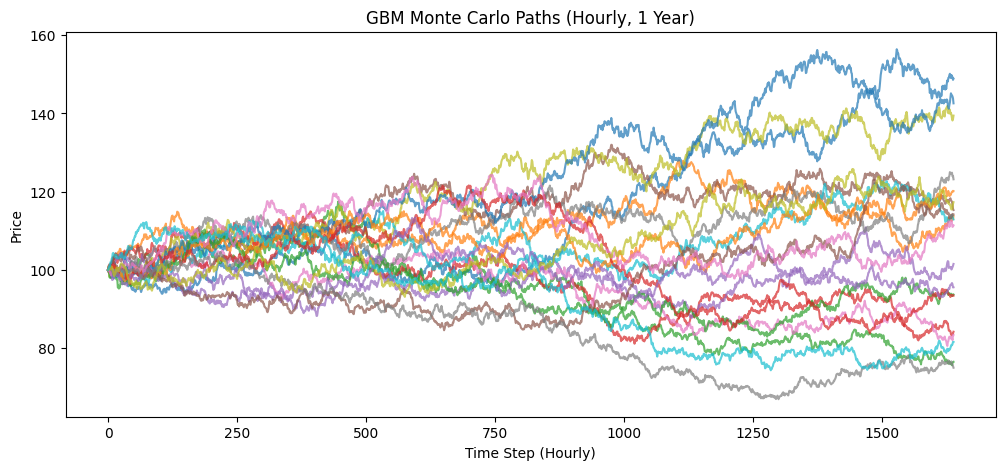

In [6]:
plt.figure(figsize=(12, 5))
for i in range(20):
    plt.plot(paths[i], alpha=0.7)

plt.title("GBM Monte Carlo Paths (Hourly, 1 Year)")
plt.xlabel("Time Step (Hourly)")
plt.ylabel("Price")
plt.show()

In [7]:
theoretical_mean = S0 * np.exp(mu * T)
simulated_mean = paths[:, -1].mean()

theoretical_mean, simulated_mean

(np.float64(108.32870676749586), np.float64(108.33031659903332))

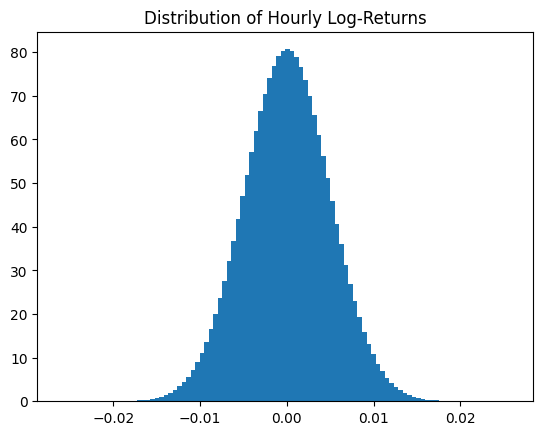

In [8]:
log_returns = np.diff(np.log(paths), axis=1).flatten()

plt.hist(log_returns, bins=100, density=True)
plt.title("Distribution of Hourly Log-Returns")
plt.show()